# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

investigate **linear relationships** among 

1) Fire arm possession

2) Homicides by fire arms 

3) GDP

4) Number of mass shootings 

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy.stats
import statsmodels.formula.api as smf
import seaborn as sns


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# import data set
df = pd.read_csv('https://github.com/fedhere/PUI2017_fb55/raw/master/HW5_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv')
ms = pd.read_csv('https://github.com/SPTKL/PUI2017_bc1561/raw/master/HW5_bc1561/data-pvLFI.csv')
pp = pd.read_csv('https://github.com/SPTKL/PUI2017_bc1561/raw/master/HW5_bc1561/API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows = [0,1,2,3])
gdp = pd.read_csv('https://github.com/SPTKL/PUI2017_bc1561/raw/master/HW5_bc1561/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows = [0,1,2,3])

In [3]:
#only pick 2012 population and 2012 gdp 
pp = pp[['Country Name', '2012']]
gdp = gdp[['Country Name', '2012']]

In [4]:
pp = pp.rename(columns = {'Country Name':'Country', '2012':'pop'})
gdp = gdp.rename(columns = {'Country Name':'Country', '2012':'gdp'})
df = df.rename(columns = {'Country/Territory':'Country'})

In [5]:
df = df.merge(ms, left_on="Country", right_on="Country")
df = df.merge(pp, left_on="Country", right_on="Country")
df = df.merge(gdp, left_on="Country", right_on="Country")
df = df.rename(columns = {'Average total all civilian firearms':"Average_total_all_civilian_firearms", 'Number of homicides by firearm': 'Number_of_homicides_by_firearm', 'Number of mass shootings':'Number_of_mass_shootings'})

In [6]:
df.head()

,Country,ISO code,Source,% of homicides by firearm,Number_of_homicides_by_firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average_total_all_civilian_firearms,Guns/100 inhabitants,Number_of_mass_shootings,pop,gdp
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,15.0,4,22728254.0,1.538194e+12
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,30.4,1,8429991.0,4.074516e+11
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,30.8,4,34750545.0,1.824289e+12
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,12.0,0,5591572.0,3.271489e+11
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,45.3,2,5413971.0,2.567065e+11


In [7]:
df = df[['Country', 'pop', 'gdp', 'Average_total_all_civilian_firearms', 'Number_of_homicides_by_firearm', 'Number_of_mass_shootings']]

In [8]:
df_ = df

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


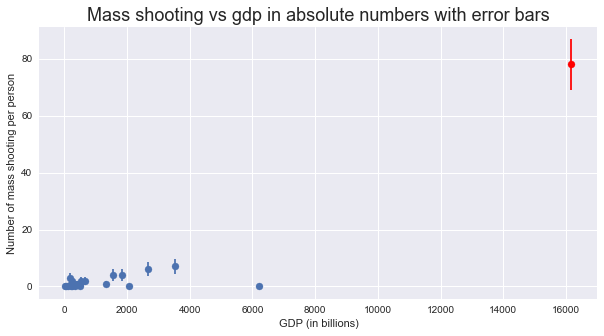

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [9]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.loc[0:20, 'gdp'] / 1e9, df_.loc[0:20, 'Number_of_mass_shootings'])
scatter = ax.scatter(df_.loc[21, 'gdp'] / 1e9, df_.loc[21, 'Number_of_mass_shootings'], color = 'r')
ax.errorbar(df_.loc[0:20, 'gdp'] / 1e9, df_.loc[0:20, 'Number_of_mass_shootings'], 
            yerr = np.sqrt(df_.loc[0:20, 'Number_of_mass_shootings'] * 1.0), fmt = '.')

ax.errorbar(df_.loc[21, 'gdp'] / 1e9, df_.loc[21, 'Number_of_mass_shootings'], 
            yerr = np.sqrt(df_.loc[21, 'Number_of_mass_shootings'] * 1.0), fmt = '.', color = 'r')


ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.title('Mass shooting vs gdp in absolute numbers with error bars', fontsize = 18)
pl.show()

print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


In [10]:
df_['gdp_pp'] = df_['gdp'] / df_['pop']

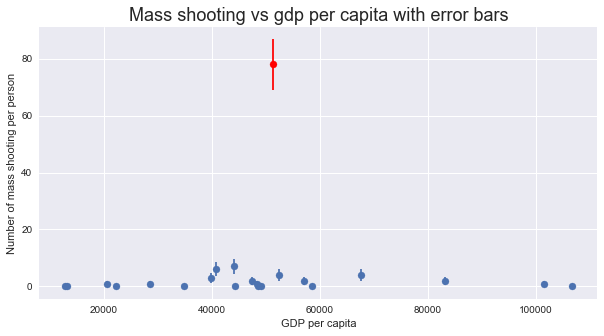

Number of mass shooting vs GDP per capita, errors represent Poisson statistics.
The datapoint to the top middle of the plot is the USA, which has the highest number of mass shootings among countries of different income level


In [11]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.loc[0:20, 'gdp_pp'], df_.loc[0:20, 'Number_of_mass_shootings'])
scatter = ax.scatter(df_.loc[21, 'gdp_pp'], df_.loc[21, 'Number_of_mass_shootings'], color = 'r')
ax.errorbar(df_.loc[0:20, 'gdp_pp'], df_.loc[0:20, 'Number_of_mass_shootings'], 
            yerr = np.sqrt(df_.loc[0:20, 'Number_of_mass_shootings'] * 1.0), fmt = '.')

ax.errorbar(df_.loc[21, 'gdp_pp'], df_.loc[21, 'Number_of_mass_shootings'], 
            yerr = np.sqrt(df_.loc[21, 'Number_of_mass_shootings'] * 1.0), fmt = '.', color = 'r')

ax.set_xlabel("GDP per capita")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.title('Mass shooting vs gdp per capita with error bars', fontsize = 18)
pl.show()

print ("Number of mass shooting vs GDP per capita, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top middle of the plot is the USA, " + 
       "which has the highest number of mass shootings among countries of different income level")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [12]:
df_['Average_civilian_firearms_pp'] = df_["Average_total_all_civilian_firearms"] / df_['pop']

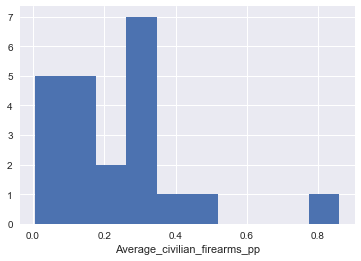

In [13]:
fig, ax = plt.subplots()
ax.hist(df_.Average_civilian_firearms_pp)
ax.set_xlabel('Average_civilian_firearms_pp');

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

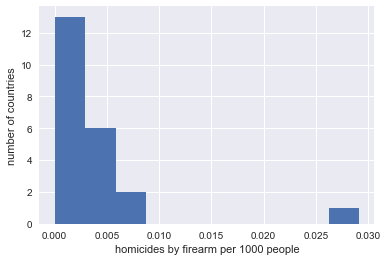

as we can see, there is only one country that has waymore homicides by firearm per 1000 people than the restafter looking up the data, we determined it is the United States


In [14]:
fig, ax = plt.subplots()
ax.hist(df_['Number_of_homicides_by_firearm'] / df_['pop'] * 1000)
# ax.errorbar(df_['Number of homicides by firearm'] / df_['pop'] * 1000, ax.get_ylim, 
#             yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1000), fmt = '.')
ax.set_xlabel('homicides by firearm per 1000 people');
ax.set_ylabel('number of countries');
pl.show()

print('as we can see, there is only one country that has way' +
      'more homicides by firearm per 1000 people than the rest' + 
     'after looking up the data, we determined it is the United States')

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color

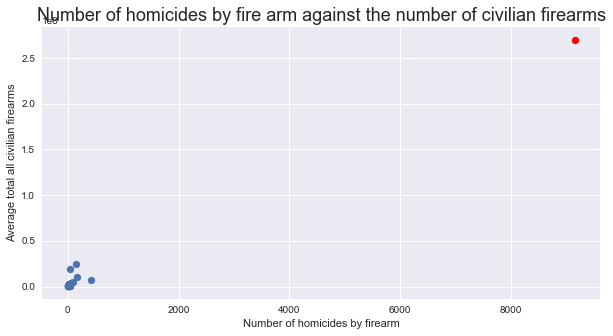

number of homicides by fire arm against the number of civilian firearmsThe datapoint to the top right of the plot is the USA, which has noth the highest homicides by fire armand the highest number of civilian gun ownership


In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.loc[0:20, 'Number_of_homicides_by_firearm'], df_.loc[0:20,'Average_total_all_civilian_firearms'])
scatter = ax.scatter(df_.loc[21,'Number_of_homicides_by_firearm'], df_.loc[21, 'Average_total_all_civilian_firearms'], color = 'r', label='United States')
# ax.errorbar(df_.loc[0:20, 'Number_of_homicides_by_firearm'], df_.loc[0:20,'Average_total_all_civilian_firearms'], 
#             yerr = np.sqrt(df_.loc[0:20,'Average_total_all_civilian_firearms'] * 1.0), fmt = '.')

# ax.errorbar(df_.loc[21, 'Number_of_homicides_by_firearm'], df_.loc[21,'Average_total_all_civilian_firearms'], 
#             yerr = np.sqrt(df_.loc[21,'Average_total_all_civilian_firearms'] * 1.0), fmt = '.', color = 'red')

ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.title('Number of homicides by fire arm against the number of civilian firearms', fontsize = 18)
pl.show()

print ("number of homicides by fire arm against the number of civilian firearms" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest homicides by fire arm" +
       "and the highest number of civilian gun ownership")


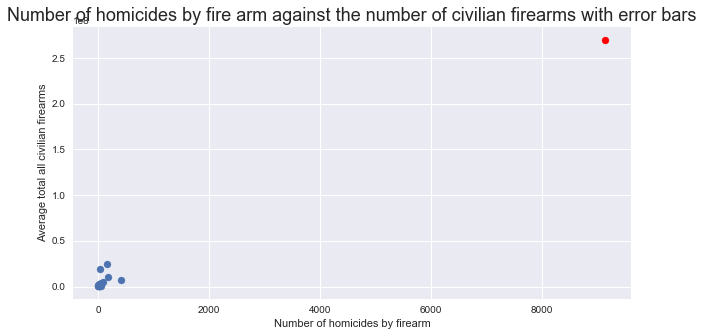

number of homicides by fire arm against the number of civilian firearmsThe datapoint to the top right of the plot is the USA, which has noth the highest homicides by fire armand the highest number of civilian gun ownership


In [16]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.loc[0:20, 'Number_of_homicides_by_firearm'], df_.loc[0:20,'Average_total_all_civilian_firearms'])
scatter = ax.scatter(df_.loc[21,'Number_of_homicides_by_firearm'], df_.loc[21, 'Average_total_all_civilian_firearms'], color = 'r')
ax.errorbar(df_.loc[0:20, 'Number_of_homicides_by_firearm'], df_.loc[0:20,'Average_total_all_civilian_firearms'], 
            yerr = np.sqrt(df_.loc[0:20,'Average_total_all_civilian_firearms'] * 1.0), fmt = '.')

ax.errorbar(df_.loc[21, 'Number_of_homicides_by_firearm'], df_.loc[21,'Average_total_all_civilian_firearms'], 
            yerr = np.sqrt(df_.loc[21,'Average_total_all_civilian_firearms'] * 1.0), fmt = '.', color = 'red')

ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Average total all civilian firearms")
ax.set_ylim()
pl.title('Number of homicides by fire arm against the number of civilian firearms with error bars', fontsize = 18)
pl.show()

print ("number of homicides by fire arm against the number of civilian firearms" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest homicides by fire arm" +
       "and the highest number of civilian gun ownership")


## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


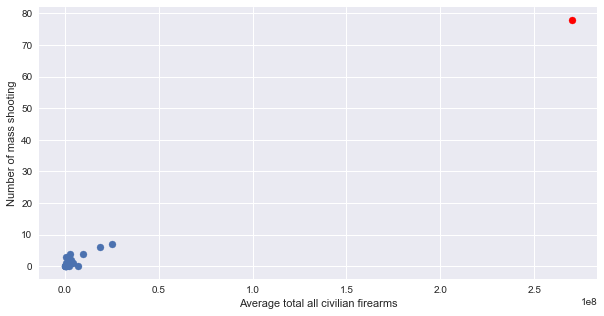

In [17]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.loc[0:20, 'Average_total_all_civilian_firearms'], 
                     df_.loc[0:20,'Number_of_mass_shootings'])
scatter = ax.scatter(df_.loc[21,'Average_total_all_civilian_firearms'], 
                     df_.loc[21, 'Number_of_mass_shootings'], color = 'r', label='United States')

ax.set_xlabel('Average total all civilian firearms')
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
pl.show()

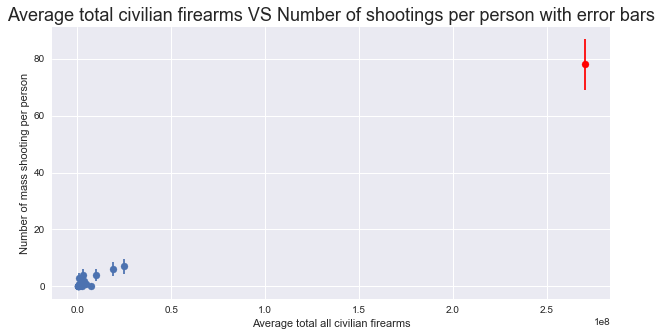

In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.loc[0:20, 'Average_total_all_civilian_firearms'], 
                     df_.loc[0:20,'Number_of_mass_shootings'])
scatter = ax.scatter(df_.loc[21,'Average_total_all_civilian_firearms'], 
                     df_.loc[21, 'Number_of_mass_shootings'], color = 'r', label='United States')

ax.errorbar(df_.loc[0:20, 'Average_total_all_civilian_firearms'], 
            df_.loc[0:20,'Number_of_mass_shootings'], 
            yerr = np.sqrt(df_.loc[0:20,'Number_of_mass_shootings'] * 1.0), fmt = '.')

ax.errorbar(df_.loc[21, 'Average_total_all_civilian_firearms'], 
            df_.loc[21,'Number_of_mass_shootings'], 
            yerr = np.sqrt(df_.loc[21,'Number_of_mass_shootings'] * 1.0), fmt = '.', color = 'red')

ax.set_xlabel('Average total all civilian firearms')
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.title('Average total civilian firearms VS Number of shootings per person with error bars', fontsize = 18)
pl.show()

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [19]:
df_.columns

#to better show the graphs, we will show the shootings per 10^7 people
df_['Number_of_mass_shootings_pp'] = df_["Number_of_mass_shootings"] / df_['pop'] * 1e7

In [20]:
reg1 = smf.ols('Number_of_mass_shootings_pp ~ Average_civilian_firearms_pp', df_).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Number_of_mass_shootings_pp   R-squared:                       0.199
Model:                                     OLS   Adj. R-squared:                  0.159
Method:                          Least Squares   F-statistic:                     4.971
Date:                         Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                                 23:29:13   Log-Likelihood:                -39.232
No. Observations:                           22   AIC:                             82.46
Df Residuals:                               20   BIC:                             84.65
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.3149      0.515      0.612      0.548      -0.759       1.388
Average_civilian_firearms_pp     3.9106      1.754      2.230      0.037       0.252       7.569
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df_['yerr'] = np.sqrt(df_.Number_of_mass_shootings_pp)
df_['weights'] = 1/df_.yerr
df_ = df_.replace([np.inf, -np.inf], 1)
reg2 = smf.wls('Number_of_mass_shootings_pp ~ Average_civilian_firearms_pp', df_, weights = df_.weights).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:     Number_of_mass_shootings_pp   R-squared:                       0.288
Model:                                     WLS   Adj. R-squared:                  0.253
Method:                          Least Squares   F-statistic:                     8.094
Date:                         Tue, 17 Oct 2017   Prob (F-statistic):             0.0100
Time:                                 23:29:13   Log-Likelihood:                -32.788
No. Observations:                           22   AIC:                             69.58
Df Residuals:                               20   BIC:                             71.76
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0382      0.368      0.104      0.918      -0.730       0.806
Average_civilian_firearms_pp     4.0202      1.413      2.845      0.010       1.073       6.968
==============================================================================
Omnibus:                       22.889   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.815
Skew:                           1.961   Prob(JB):                     4.54e-08
Kurtosis:                       7.637   Cond. No.                         6.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

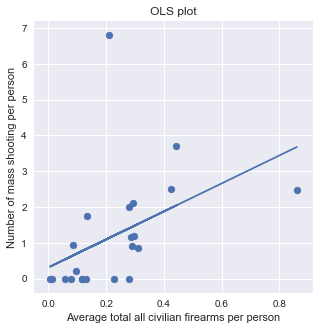

In [22]:
fig = pl.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)

ax.plot( df_.Average_civilian_firearms_pp, reg1.predict(), '-')

scatter = ax.scatter(df_.Average_civilian_firearms_pp, df_.Number_of_mass_shootings_pp)
ax.set_xlabel('Average total all civilian firearms per person')
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.title('OLS plot')
pl.show()

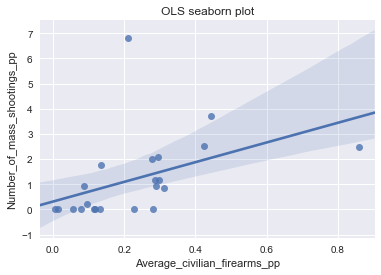

In [23]:
sns.regplot(x="Average_civilian_firearms_pp", y='Number_of_mass_shootings_pp', data=df_)
pl.title('OLS seaborn plot');

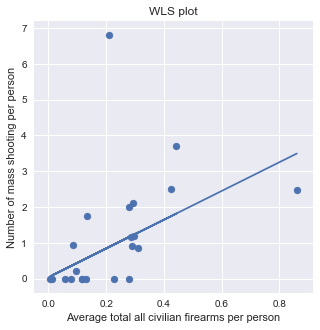

In [24]:
fig = pl.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)

ax.plot( df_.Average_civilian_firearms_pp, reg2.predict(), '-')
scatter = ax.scatter(df_.Average_civilian_firearms_pp, df_.Number_of_mass_shootings_pp)
ax.set_xlabel('Average total all civilian firearms per person')
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.title('WLS plot')
pl.show()

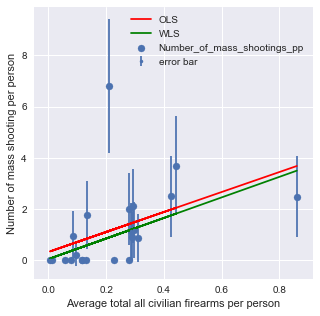

In [25]:
fig = pl.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)

ax.plot( df_.Average_civilian_firearms_pp, reg1.predict(), '-', label = 'OLS', color = 'red')
ax.plot( df_.Average_civilian_firearms_pp, reg2.predict(), '-', label = 'WLS', color = 'green')

scatter = ax.scatter(df_.Average_civilian_firearms_pp, df_.Number_of_mass_shootings_pp)
ax.errorbar(df_.Average_civilian_firearms_pp, df_.Number_of_mass_shootings_pp, 
             yerr = np.sqrt(df_.Number_of_mass_shootings_pp * 1.0), fmt = '.', label = 'error bar')
ax.set_xlabel('Average total all civilian firearms per person')
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.legend()
pl.show()